In [59]:
# enviornment settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
%matplotlib inline
# plt.style.use("dark_background")

%config InlineBackend.figure_format = 'svg'  # improve figure quality in jupyter notebook


In [60]:
datasource = {'d1': r'https://stats.bis.org/statx/srs/table/d1?f=csv', 
              'd5.1': r'https://stats.bis.org/statx/srs/table/d5.1?f=csv',
              'd5.2': r'https://stats.bis.org/statx/srs/table/d5.2?f=csv'}
# d1: Exchange-traded futures and options, by location of exchange
# d5.1: Global OTC derivatives market - Foreign exchange, interest rate, equity linked contracts
# d5.2: Global OTC derivatives market - Commodity contracts, credit default swaps
# url = datasource['d1']
# s = requests.get(url).text

## Exchange market

In [61]:
data = pd.read_csv(datasource['d1'], skiprows=6, delimiter=',', nrows=51) # The file has several sections
data.head()


,Frequency,Measure,Risk category,Instrument,Issue currency,Location of trade (Exchange or country),Period,31/03/1993,30/06/1993,30/09/1993,...,30/06/2017,30/09/2017,31/12/2017,31/03/2018,30/06/2018,30/09/2018,31/12/2018,31/03/2019,30/06/2019,30/09/2019
0,Q:Quarterly,A:Outstanding - notional amounts,B:Foreign exchange contracts,"H:Options, total",TO1:Total all currencies,8E:Asian/Pacific exchanges,Q:A:B:H:TO1:8E,0.0,0.0,0.0,...,3277.0,4984.0,2753.0,2598.0,2647.0,3489.0,2546.0,2808.0,2842.0,3056.0
1,Q:Quarterly,A:Outstanding - notional amounts,$C+B,T:Total futures,TO1:Total all currencies,8E:Asian/Pacific exchanges,Q:A:$C+B:T:TO1:8E,797420.0,1037816.0,1168787.0,...,1809290.0,1803563.0,1748623.0,1955788.0,1730473.0,1724367.0,1730568.0,2535714.0,2466671.0,1925695.0
2,Q:Quarterly,A:Outstanding - notional amounts,B:Foreign exchange contracts,"H:Options, total",TO1:Total all currencies,8A:All exchanges,Q:A:B:H:TO1:8A,89677.0,89908.0,92800.0,...,142484.0,156450.0,123671.0,136723.0,141206.0,145929.0,139033.0,142131.0,120792.0,128624.0
3,Q:Quarterly,A:Outstanding - notional amounts,$C+B,T:Total futures,TO1:Total all currencies,8K:Other exchanges,Q:A:$C+B:T:TO1:8K,3500.0,10910.0,22669.0,...,908834.0,988575.0,998481.0,1013323.0,909280.0,865866.0,846019.0,787526.0,860716.0,950167.0
4,Q:Quarterly,A:Outstanding - notional amounts,B:Foreign exchange contracts,"H:Options, total",TO1:Total all currencies,8C:European exchanges,Q:A:B:H:TO1:8C,587.0,500.0,591.0,...,2419.0,1892.0,2135.0,1661.0,1092.0,805.0,1465.0,2166.0,1568.0,1013.0


In [62]:
from datetime import datetime
selrecno = [8, 15]  # line number -8  futures:16 , options:23
# find columns loc
# The time >= 2000

def selcols(columns, selyear):
    cols = [] 
    for i, c in enumerate(columns):
        try:
            year = datetime.strptime(c, r'%d/%m/%Y').year  # if import datetime, datetime.datetime.strptime
        except:
            year =None  
        if year and year>=selyear:
            cols.append(i)
    return cols   
ge2000 = selcols(data.columns, 2000)

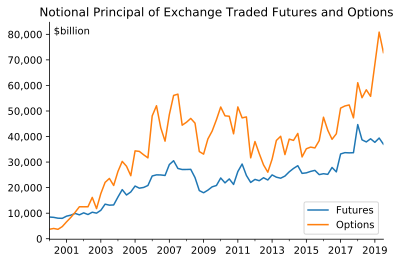

In [63]:
# from matplotlib.ticker import FormatStrFormatter
dataex = data.iloc[selrecno, ge2000].T
dataex.columns = ['Futures', 'Options']
dataex.index = pd.to_datetime(dataex.index)
dataex = dataex /1000 # change from millions to billions
axes = dataex.plot()
axes.set_title('Notional Principal of Exchange Traded Futures and Options')
axes.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axes.legend(loc=4)
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.text(datetime(2000,6,1),80000, '$billion')
exfname = 'fig-ex2019.pdf'
plt.savefig(exfname, pad_inches=0, format='pdf', dp=600)

## OTC Market

In [89]:
data = pd.read_csv(datasource['d5.1'], skiprows=6, delimiter=',') # The file has several sections
data.head()
# data.shape


(103, 58)

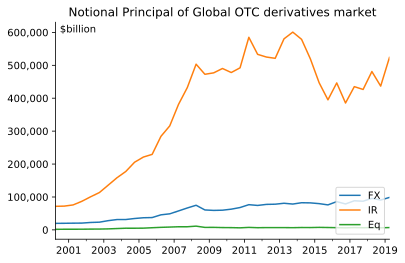

In [91]:
selrecno = [94, 110, 88, 18]  #all: 94 , fx: 110, ir:88, equity-link: 18
selrecno = [i-8 for i in selrecno]
ge2000 = selcols(data.columns,2000)
dataotc = data.iloc[selrecno, ge2000].T
dataotc.columns = ['All', 'FX', 'IR', 'Eq']
dataotc.index = pd.to_datetime(dataotc.index)
dataotc = dataotc.astype('float')
dataotc = dataotc /1000 # change from millions to billions
data2 = dataotc[['FX', 'IR', 'Eq']]
axes = data2.plot()
axes.set_title('Notional Principal of Global OTC derivatives market')
axes.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axes.legend(loc=4)
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.text(datetime(2000,9,1),600000, '$billion')
exfname = 'fig-otccom.pdf'
plt.savefig(exfname, pad_inches=0, format='pdf', dpi=600)

In [92]:
# Commodity contracts, credit default swaps 
data = pd.read_csv(datasource['d5.2'], skiprows=6, delimiter=',') # The file has several sections
data.head()


,Frequency,Derivatives measure,Derivatives instrument,Derivatives risk category,Derivatives reporting country,Derivatives counterparty sector,Derivatives counterparty country,Derivatives underlying risk sector,Derivatives currency leg 1,Derivatives currency leg 2,...,31/12/2014,30/06/2015,31/12/2015,30/06/2016,31/12/2016,30/06/2017,31/12/2017,30/06/2018,31/12/2018,30/06/2019
0,H:Half-yearly,A:Outstanding - notional amounts,T:Options bought,Q:Other commodities,5J:All countries (total),A:Total (all counterparties),5J:All countries (total),A:Total (all sectors),TO1:Total (all currencies),TO1:Total (all currencies),...,3.186355e+05,2.981534e+05,2.043887e+05,1.811053e+05,158843.140,149166.969,178168.144,200366.560,163191.899,171373.416
1,H:Half-yearly,A:Outstanding - notional amounts,U:Credit default swaps,T:Credit Derivatives,5J:All countries (total),K:Central Counterparties,5J:All countries (total),A:Total (all sectors),TO1:Total (all currencies),TO1:Total (all currencies),...,4.790167e+06,4.504819e+06,4.184649e+06,4.392372e+06,4338833.483,4912269.945,5135969.355,4519175.558,4444633.526,4217014.286
2,H:Half-yearly,A:Outstanding - notional amounts,U:Credit default swaps,T:Credit Derivatives,5J:All countries (total),P:Other residual financial institutions,5J:All countries (total),A:Total (all sectors),TO1:Total (all currencies),TO1:Total (all currencies),...,1.100493e+06,1.001676e+06,6.674875e+05,6.370687e+05,525455.901,589786.099,618483.374,623592.077,658447.163,777719.656
3,H:Half-yearly,A:Outstanding - notional amounts,U:Credit default swaps,T:Credit Derivatives,5J:All countries (total),U:Non-financial customers,5J:All countries (total),A:Total (all sectors),TO1:Total (all currencies),TO1:Total (all currencies),...,2.019132e+05,2.105051e+05,1.938310e+05,1.576278e+05,152591.713,159335.398,216291.817,236499.448,270509.098,305146.616
4,H:Half-yearly,A:Outstanding - notional amounts,U:Credit default swaps,T:Credit Derivatives,5J:All countries (total),A:Total (all counterparties),5J:All countries (total),A:Total (all sectors),TO1:Total (all currencies),TO1:Total (all currencies),...,1.650720e+07,1.468934e+07,1.237858e+07,1.184689e+07,9930584.547,9726887.283,9354394.135,8345110.790,8140767.450,7808516.001


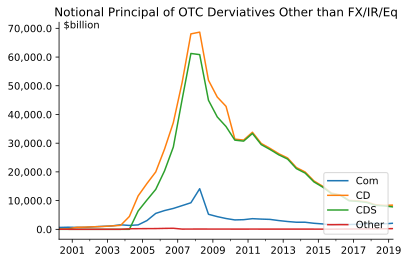

In [98]:
selrecno = [56, 38, 12, 26] #Commodity contracts: 56, Credit derivatives: 38,  Credit default swaps: 12, Other derivatives: 26
selrecno = [i-8 for i in selrecno]
ge2000 = selcols(data.columns, 2000)
dataotco = data.iloc[selrecno, ge2000].T
dataotco.columns = ['Com', 'CD', 'CDS', 'Other']
dataotco.index = pd.to_datetime(dataotco.index)
dataotco.replace('...', 0, inplace=True)
dataotco = dataotco.astype('float')
dataotco = dataotco /1000 # change from millions to billions
axes = dataotco.plot()
# fig = plt.gcf()
# fig.set_size_inches(12/2.54, 9/2.54)
# size = fig.get_size_inches()
axes.set_title('Notional Principal of OTC Derviatives Other than FX/IR/Eq')
axes.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axes.legend(loc=4)
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.text(datetime(2000,9,1),70000, '$billion')
exfname = 'fig-otco.pdf'
plt.savefig(exfname,  pad_inches=0, format='pdf', dpi=600)

## OTC vs. Exchange

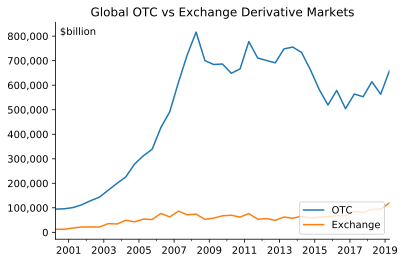

In [126]:
allotccom = dataotc['All']
allotco = dataotco.sum(axis=1)
allotco = pd.concat([allotco, allotccom], axis=1)
allotco['OTC'] = allotco.sum(axis=1)
allex = pd.DataFrame(dataex.sum(axis=1))
allex.columns=['Exchange']
allotcex = allotco.join(allex, how='inner')
axes = allotcex[['OTC', 'Exchange']].plot()
axes.set_title('Global OTC vs Exchange Derivative Markets')
axes.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axes.legend(loc=4)
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.text(datetime(2000,9,1),805000, '$billion')
exfname = 'fig-otcex.pdf'
plt.savefig(exfname, pad_inches=0, format='pdf', dpi=600)
